>## ¿Es Star Wars la franquicia más rentable de la historia del cine?

### Índice

1. Introducción
2. Hipótesis inicial
3. Búsqueda y preparación de información
    - 3.1 Briefing y primer vistazo a la competencia
    - 3.2 Lectura y limpieza de missing values
    - 3.3 Dataframe Indiana Jones
    - 3.4 Ajuste de tipos y formatos
    - 3.5 Adjuntamos pequeño dataframe de rating y voteCount
    - 3.6 Problemática por estudios con Lucasfilm, mapeo y solución por Franquicia
    - 3.7 Groupby por franquicias para ver datos generales y posibles insights
    - 3.8 Separación, lectura y análisis de los datos de Star Wars por separado
    - 3.9 Comprobación y aprobación de dataframes
4. De lo general a lo particular. Análisis y visualización
    - 4.1 Datos económicos entre franquicias
    - 4.2 Factor tiempo en la industria cinematográfica
    - 4.3 Star Wars y sus individualidades 
5. Conclusiones
6. Next Steps

## 1. Introducción

Para poder introducirse en este EDA es importante situarte en una conversacion que probablemente hayas vivido y si no es así, la persona mas cercana a ti seguro que si. Hablamos de ese momento en el que se genera un debate sobre cual y ¿por qué **Star Wars**? es la franquicia más importante del cine. 

Lo que a través del "conocimiento de negocio" que como espectador y amante de Star Wars tengo, he querido contrastar con datos si entre otras, la siguiente hipotesis es cierta o no.

1. Tras buscar en diferentes datasets encontramos uno bastante limpio en *Kaggle*, que aúna algunas de las franquicias mas importantes con las queremos trabajar e información necesarias para hacer el estudio económico.

2. El resto de información que nos faltaba ha sido completada (al no ser mucha cantidad) mediante obtención manual,de las webs oficiales de *Wikipedia* y *FilmAfinity* no he creido necesario el uso del webscrapping para esta primera fase de obtención de datos.

## 2. Hipótesis inicial

- ¿Es Star Wars la mejor franquicia de la historia?

Según la *R.A.E*, "mejor" se define como un adjetivo y dice ser superior a otra cosa y que la excede en una cualidad natural o moral.
Vamos a tratar de analizar algunas de las cualidades naturales de las peliculas para determinar si es la *"mejor"* y/o en que.

## 3. Búsqueda y preparación de información

Comenzamos haciendo búsquedas de datasets que cuadren con la información que buscamos,(world data, statista, kaggle, dataset search de google, adjuntamos alguno en la carpeta data) encontramos distintos datasets que contienen datos tanto de peliculas, como actores y directores, datos sociales referentes al rating y cantidad de votos en diferentes plataformas.

1. Tras el briefing,la búsqueda y un primer vistazo a las previews de los dataset decidimos que las franquicias a analizar vs Star Wars serán:
    - Universo Cinematográfico de Marvel
    - Harry Potter
    - Jurassic Park
    - El señor de los anillos
    - Indiana Jones*

In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import locale
import warnings 

In [70]:
warnings.filterwarnings("ignore")

2. Usamos la libreria pandas y varios jupiter notebooks (consultar en la carpeta "Notebooks" del repositorio) y limpiamos el dataframe "Franchise_movies.csv" dejándolo solo con las filas y columnas que creemos conveniente.

In [71]:
df = pd.read_csv("data/MovieFranchises.csv", index_col=0)

In [72]:
pd.set_option("display.max_rows", 610)

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 605 entries, 0 to 604
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   MovieID         605 non-null    object 
 1   Title           605 non-null    object 
 2   Lifetime Gross  605 non-null    object 
 3   Year            66 non-null     object 
 4   Studio          60 non-null     object 
 5   Rating          60 non-null     object 
 6   Runtime         60 non-null     float64
 7   Budget          60 non-null     float64
 8   ReleaseDate     60 non-null     object 
 9   VoteAvg         60 non-null     float64
 10  VoteCount       60 non-null     float64
 11  FranchiseID     60 non-null     float64
dtypes: float64(5), object(7)
memory usage: 61.4+ KB


In [74]:
df = df[0:60]

3. En nuestra investigación sobre las franquicias con las que queriamos "enfretar" a Star Wars para validar nuestras hipotesis encontramos que falta una franquicia que puede ser interesante tener por diferentes factores, con un total de 5 películas, Indiana Jones, tanto por datos económicos como por director o su "edad" encaja perfectamente en nuestro ranking. No la encontramos o es muy dificil acceder a los datos mediante los datasets y creemos que lo más sencillo es optar a crear el diccionario de manera manual obteniendo los datos de Wikipedia y FilmAffinity.
Creamos el diccionario, su dataframe respectivo en pandas y lo mergeamos con el dataframe original.

In [75]:
datos_indiana = {"MovieID" : [1061,1062,1063,1064,1065],
                "Title" : ["Indiana Jones en busca del arca perdida","Indiana Jones y el templo maldito","Indiana Jones y la última cruzada","Indiana Jones y el reino de la calavera de cristal","Indiana Jones y el dial del destino"],
                "Lifetime Gross" : [389925971,333000000,474171806,790653823,375017981],
                "Year" : [1981,1984,1989,2008,2023],
                "Studio" : ["Lucasfilm","Lucasfilm","Lucasfilm","Lucasfilm","Lucasfilm"],
                "Runtime" : [115,118,127,123,154],
                "Budget" : [18000000,28000000,48000000,185000000,300000000],
                "ReleaseDate" : ["06-12-81","05-23-84","05-24-89","05-21-08","06-28-23"],
                "FranchiseID" : [106,106,106,106,106,]}

In [76]:
df3 = pd.DataFrame(datos_indiana)
df3

,MovieID,Title,Lifetime Gross,Year,Studio,Runtime,Budget,ReleaseDate,FranchiseID
0,1061,Indiana Jones en busca del arca perdida,389925971,1981,Lucasfilm,115,18000000,06-12-81,106
1,1062,Indiana Jones y el templo maldito,333000000,1984,Lucasfilm,118,28000000,05-23-84,106
2,1063,Indiana Jones y la última cruzada,474171806,1989,Lucasfilm,127,48000000,05-24-89,106
3,1064,Indiana Jones y el reino de la calavera de cri...,790653823,2008,Lucasfilm,123,185000000,05-21-08,106
4,1065,Indiana Jones y el dial del destino,375017981,2023,Lucasfilm,154,300000000,06-28-23,106


In [77]:
df_total = pd.concat([df, df3], axis=0,)
df_total.tail()

,MovieID,Title,Lifetime Gross,Year,Studio,Rating,Runtime,Budget,ReleaseDate,VoteAvg,VoteCount,FranchiseID
0,1061,Indiana Jones en busca del arca perdida,389925971,1981,Lucasfilm,NaN,115.00,18000000.00,06-12-81,NaN,NaN,106.00
1,1062,Indiana Jones y el templo maldito,333000000,1984,Lucasfilm,NaN,118.00,28000000.00,05-23-84,NaN,NaN,106.00
2,1063,Indiana Jones y la última cruzada,474171806,1989,Lucasfilm,NaN,127.00,48000000.00,05-24-89,NaN,NaN,106.00
3,1064,Indiana Jones y el reino de la calavera de cri...,790653823,2008,Lucasfilm,NaN,123.00,185000000.00,05-21-08,NaN,NaN,106.00
4,1065,Indiana Jones y el dial del destino,375017981,2023,Lucasfilm,NaN,154.00,300000000.00,06-28-23,NaN,NaN,106.00


In [78]:
df_total.reset_index(drop=True, inplace=True)

In [79]:
data = df_total

4. Añadimos algunas columnas con formulas básicas entre columnas numéricas para poder sacar otros calculos como la rentabilidad o el % de rentabilidad. Además modificamos el tipo de algunas de las columnas para poder operar con ellas.
También usamos el método "locale" para formatear textos o números que necesitamos, ya que aparecen en notación científica y no nos es muy amigable y preferimos verlo en notación decimal.

In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   MovieID         65 non-null     object 
 1   Title           65 non-null     object 
 2   Lifetime Gross  65 non-null     object 
 3   Year            65 non-null     object 
 4   Studio          65 non-null     object 
 5   Rating          60 non-null     object 
 6   Runtime         65 non-null     float64
 7   Budget          65 non-null     float64
 8   ReleaseDate     65 non-null     object 
 9   VoteAvg         60 non-null     float64
 10  VoteCount       60 non-null     float64
 11  FranchiseID     65 non-null     float64
dtypes: float64(5), object(7)
memory usage: 6.2+ KB


In [81]:
data["Lifetime Gross"] = data["Lifetime Gross"].astype(float)
data["Rentabilidad"] = data["Lifetime Gross"] - data["Budget"]
data["'%'Rentabilidad"] = round(((data["Lifetime Gross"] - data["Budget"] ) / data["Budget"]) * 100)
data["Lifetime Gross"] = data["Lifetime Gross"].apply(lambda x: locale.format("%d", x, grouping=True))
data["Rentabilidad"] = data["Rentabilidad"].apply(lambda x: locale.format("%d", x, grouping=True))
data["Rentabilidad"] = data["Rentabilidad"].astype(float)
data["Lifetime Gross"] = round(data["Lifetime Gross"].astype(float),3)
pd.options.display.float_format = '{:.2f}'.format

In [82]:
data.head()

,MovieID,Title,Lifetime Gross,Year,Studio,Rating,Runtime,Budget,ReleaseDate,VoteAvg,VoteCount,FranchiseID,Rentabilidad,'%'Rentabilidad
0,1001,Star Wars: Episode IV - A New Hope,775398007.00,1977,Lucasfilm,PG,121.00,11000000.00,05-25-77,4.09,96233.00,101.00,764398007.00,6949.00
1,1002,Star Wars: Episode V - The Empire Strikes Back,538375067.00,1980,Lucasfilm,PG,124.00,18000000.00,06-20-80,4.12,79231.00,101.00,520375067.00,2891.00
2,1003,Star Wars: Episode VI - Return of the Jedi,475106177.00,1983,Lucasfilm,PG,135.00,32500000.00,05-25-83,3.98,76082.00,101.00,442606177.00,1362.00
3,1004,Jurassic Park,1109802321.00,1993,Universal Pictures,PG-13,127.00,63000000.00,06-11-93,3.69,82700.00,102.00,1046802321.00,1662.00
4,1005,The Lost World: Jurassic Park,618638999.00,1997,Universal Pictures,PG-13,129.00,73000000.00,05-23-97,3.01,19721.00,102.00,545638999.00,747.00


5. El dataset original tenía información sobre rating y votos que no casaba con la información que estabamos contrastando en fuentes fiables que consultabamos para contrastar datos, decidimos asi coger 2 nuevas columnas del data frame de FilmAffinity para concretar y tener limpia esta información. La mergeamos con el dataframe original

In [83]:
df_votos = pd.read_csv("data/df_puntuacion_votos.csv")

In [84]:
df_votos["puntuacion"] = df_votos["puntuacion"].str.replace(",",".")
df_votos["puntuacion"] = df_votos["puntuacion"].astype(float)
df_votos.rename(columns={"pelicula": "Title"}, inplace=True)

In [85]:
data = data.merge(df_votos, on="Title")

In [86]:
data.head()

,MovieID,Title,Lifetime Gross,Year,Studio,Rating,Runtime,Budget,ReleaseDate,VoteAvg,VoteCount,FranchiseID,Rentabilidad,'%'Rentabilidad,puntuacion,cantidad de votos
0,1001,Star Wars: Episode IV - A New Hope,775398007.00,1977,Lucasfilm,PG,121.00,11000000.00,05-25-77,4.09,96233.00,101.00,764398007.00,6949.00,7.90,137184
1,1002,Star Wars: Episode V - The Empire Strikes Back,538375067.00,1980,Lucasfilm,PG,124.00,18000000.00,06-20-80,4.12,79231.00,101.00,520375067.00,2891.00,8.10,136665
2,1003,Star Wars: Episode VI - Return of the Jedi,475106177.00,1983,Lucasfilm,PG,135.00,32500000.00,05-25-83,3.98,76082.00,101.00,442606177.00,1362.00,7.90,122877
3,1004,Jurassic Park,1109802321.00,1993,Universal Pictures,PG-13,127.00,63000000.00,06-11-93,3.69,82700.00,102.00,1046802321.00,1662.00,7.10,147830
4,1005,The Lost World: Jurassic Park,618638999.00,1997,Universal Pictures,PG-13,129.00,73000000.00,05-23-97,3.01,19721.00,102.00,545638999.00,747.00,5.70,50840


6. Además encontramos una problemática con el estudio Lucasfilm ya que engloba 2 franquicias y nos va a impedir categorizar por estudio con lo que hacemos un mapeo de franquicias por el franchiseID y añadimos una nueva columna llamada Franquicias.
Guardamos de nuevo el dataframe con las columnas que queremos y reordenamos el orden de las columnas para una mejor legibilidad de cada tipo de dato con los de su grupo.

In [87]:
mapeo_franquicias = {
    101: "Star Wars",
    102: "Jurassic Park",
    103: "Harry Potter",
    104: "El señor de los anillos",
    105: "U.C Marvel",
    106: "Indiana Jones"}

In [88]:
data["Franquicias"] = data["FranchiseID"].map(mapeo_franquicias)

In [89]:
data = data[["MovieID","Title","Studio","Franquicias","Year","ReleaseDate","Runtime","Lifetime Gross","Budget","puntuacion","cantidad de votos","FranchiseID","Rentabilidad","'%'Rentabilidad"]]

7. Creemos oportuno generar un nuevo dataframe haciendo un groupby de las franquicias de cara a las posibles gráficas que podamos sacar de aquí tanto como por insights que nos pueda ofrecer el propio dataframe.

In [90]:
franquicias = data.groupby("Franquicias")

In [91]:
data_franquicias = franquicias.agg({"Lifetime Gross": ["sum", "mean"],
                                    "Budget": ["sum", "mean"],
                                    "Rentabilidad": "sum",
                                    "'%'Rentabilidad": "mean",
                                    "puntuacion": "mean"}).reset_index()

In [92]:
numero_peliculas = [6,8,5,6,11,29]

In [93]:
data_franquicias["Número de películas"] = numero_peliculas

In [94]:
data_franquicias.columns = ["Franquicias", "Suma Facturación", "Media Facturación", "Suma Presupuesto", "Media Presupuesto","Rentabilidad", "'%' Rentabilidad", "Puntuación Media", "Número de películas"]

8. Con la columna Franquicias es muy facil filtrar y sacar información, pero por practicidad decidimos establecer en un nuevo dataframe llamado starwars, solo los datos de la propia franquicia individualmente. Podriamos sacar los de todos mediante esta columna de manera sencilla si fuera necesario.(En los borradores está hecho)

In [95]:
starwars = data[data["FranchiseID"] == 101]
starwars

,MovieID,Title,Studio,Franquicias,Year,ReleaseDate,Runtime,Lifetime Gross,Budget,puntuacion,cantidad de votos,FranchiseID,Rentabilidad,'%'Rentabilidad
0,1001,Star Wars: Episode IV - A New Hope,Lucasfilm,Star Wars,1977,05-25-77,121.00,775398007.00,11000000.00,7.90,137184,101.00,764398007.00,6949.00
1,1002,Star Wars: Episode V - The Empire Strikes Back,Lucasfilm,Star Wars,1980,06-20-80,124.00,538375067.00,18000000.00,8.10,136665,101.00,520375067.00,2891.00
2,1003,Star Wars: Episode VI - Return of the Jedi,Lucasfilm,Star Wars,1983,05-25-83,135.00,475106177.00,32500000.00,7.90,122877,101.00,442606177.00,1362.00
5,1006,Star Wars: Episode I - The Phantom Menace,Lucasfilm,Star Wars,1999,05-19-99,136.00,1027082707.00,115000000.00,6.20,103888,101.00,912082707.00,793.00
9,1010,Star Wars: Episode II - Attack of the Clones,Lucasfilm,Star Wars,2002,05-15-02,142.00,653779970.00,120000000.00,6.30,107369,101.00,533779970.00,445.00
14,1015,Star Wars: Episode III - Revenge of the Sith,Lucasfilm,Star Wars,2005,05-17-05,140.00,868390560.00,113000000.00,7.10,103276,101.00,755390560.00,668.00
36,1037,Star Wars: Episode VII - The Force Awakens,Lucasfilm,Star Wars,2015,12-18-15,136.00,2069521700.00,306000000.00,6.70,64579,101.00,1763521700.00,576.00
39,1040,Rogue One: A Star Wars Story,Lucasfilm,Star Wars,2016,12-14-16,133.00,1058682142.00,200000000.00,6.90,46951,101.00,858682142.00,429.00
43,1044,Star Wars: Episode VIII - The Last Jedi,Lucasfilm,Star Wars,2017,12-15-17,152.00,1332698830.00,317000000.00,6.10,42717,101.00,1015698830.00,320.00
46,1047,Solo: A Star Wars Story,Lucasfilm,Star Wars,2018,05-25-18,135.00,392924807.00,275000000.00,6.00,24623,101.00,117924807.00,43.00


9. Comprobamos que la información que tenemos tiene el formato y todo lo que necesitamos para poder seguir con el flujo de trabajo. Llegados a este punto tenemos los dataframes listos para empezar a procesar esta información y poder empezar a contrastar hipótesis. Comprobamos que todo

In [96]:
data_franquicias

,Franquicias,Suma Facturación,Media Facturación,Suma Presupuesto,Media Presupuesto,Rentabilidad,'%' Rentabilidad,Puntuación Media,Número de películas
0,El señor de los anillos,5930687178.00,988447863.00,1016000000.00,169333333.33,4914687178.00,660.33,7.37,6
1,Harry Potter,7792724634.00,974090579.25,1280000000.00,160000000.00,6512724634.00,572.12,6.65,8
2,Indiana Jones,2362769581.00,472553916.20,579000000.00,115800000.00,1783769581.00,879.00,6.96,5
3,Jurassic Park,6077008329.00,1012834721.50,714000000.00,119000000.00,5363008329.00,816.00,5.65,6
4,Star Wars,10266109246.00,933282658.73,1782500000.00,162045454.55,8483609246.00,1342.45,6.80,11
5,U.C Marvel,27432639035.00,945953070.17,5722000000.00,197310344.83,21710639035.00,362.14,6.28,29


In [97]:
data.head()

,MovieID,Title,Studio,Franquicias,Year,ReleaseDate,Runtime,Lifetime Gross,Budget,puntuacion,cantidad de votos,FranchiseID,Rentabilidad,'%'Rentabilidad
0,1001,Star Wars: Episode IV - A New Hope,Lucasfilm,Star Wars,1977,05-25-77,121.00,775398007.00,11000000.00,7.90,137184,101.00,764398007.00,6949.00
1,1002,Star Wars: Episode V - The Empire Strikes Back,Lucasfilm,Star Wars,1980,06-20-80,124.00,538375067.00,18000000.00,8.10,136665,101.00,520375067.00,2891.00
2,1003,Star Wars: Episode VI - Return of the Jedi,Lucasfilm,Star Wars,1983,05-25-83,135.00,475106177.00,32500000.00,7.90,122877,101.00,442606177.00,1362.00
3,1004,Jurassic Park,Universal Pictures,Jurassic Park,1993,06-11-93,127.00,1109802321.00,63000000.00,7.10,147830,102.00,1046802321.00,1662.00
4,1005,The Lost World: Jurassic Park,Universal Pictures,Jurassic Park,1997,05-23-97,129.00,618638999.00,73000000.00,5.70,50840,102.00,545638999.00,747.00


## 4. De lo general a lo particular. Análisis y visualización

Comenzamos empezando a comparar los datos de facturación para tener una visión general de que tenemos delante.

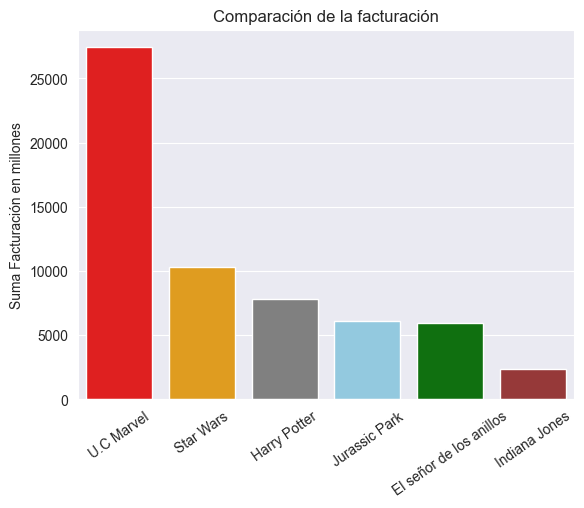

In [98]:
colores = ["red","orange","grey","skyblue","green","brown"]
sns.set_style('darkgrid')
data_franquicias = data_franquicias.sort_values(by="Suma Facturación", ascending=False)
graf_facturacion = sns.barplot(data=data_franquicias, x="Franquicias", y="Suma Facturación", palette=colores, legend=False)
valores_y = ["0","5000","10000","15000","20000","25000"]
graf_facturacion.set_yticklabels(valores_y)
plt.ylabel("Suma Facturación en millones")
plt.xlabel("")
graf_facturacion.set_xticklabels(graf_facturacion.get_xticklabels(), rotation=35)
graf_facturacion.set_title("Comparación de la facturación");

Continuamos analizando variables simples y obteniendo conclusiones sobre la comparación entre el numero de películas de cada franquicia.

Text(0.5, 1.0, 'Comparación del número de peliculas')

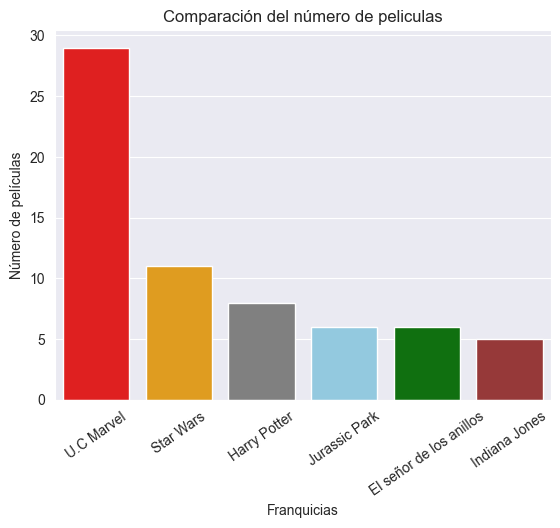

In [99]:
colores = ["red","orange","grey","skyblue","green","brown"]
data_franquicias = data_franquicias.sort_values(by="Número de películas", ascending=False)
graf_numpeliculas = sns.barplot(data=data_franquicias, x="Franquicias", y="Número de películas", palette=colores)
graf_numpeliculas.set_xticklabels(graf_numpeliculas.get_xticklabels(), rotation=35)
graf_numpeliculas.set_title('Comparación del número de peliculas')

Consideramos que para tener un esquema completo es necesario seguir comparando variables simples como la diferencia de presupuesto destinado en cada una de las franquicias.

Text(0.5, 1.0, 'Comparación de presupuestos')

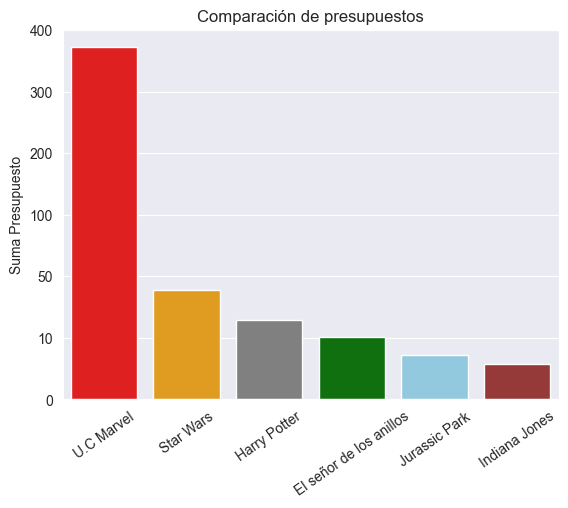

In [100]:
colores = ["red","orange","grey","green","skyblue","brown"]
data_franquicias = data_franquicias.sort_values(by="Suma Presupuesto", ascending=False)
valores_y = ["0","10","50","100","200","300","400","500"]
graf_presupuesto = sns.barplot(data=data_franquicias, x="Franquicias", y="Suma Presupuesto", palette=colores)
graf_presupuesto.set_yticklabels(valores_y)
plt.xlabel("")
graf_presupuesto.set_xticklabels(graf_presupuesto.get_xticklabels(), rotation=35)
graf_presupuesto.set_title('Comparación de presupuestos')

# Alerta Spoiler

###### La siguiente gráfica en la memoria debe ir aquí situada, de cara a la presentación del EDA es probable que no se muestre en este riguroso orden por mantener el hype

Según la definición de "Google" la definicion de rentabilidad dice: *"Para conocer la rentabilidad total de una inversión, descontando lo aportado, habrá que dividir el beneficio total entre el valor inicial. En el beneficio total se incluyen las ganancias o pérdidas de capital y los intereses o dividendos. Si se quiere obtener el porcentaje, el resultado se multiplicará por cien."*

Nosotros hemos calculado la rentabilidad individual de cada pelicula y la suma por franquicia, creemos que es interesante mostrar y contar lo que dice la media de las rentabilidades ya que hay una dispersion en cuanto a la rentabilidad individual de las peliculas bastante grande.

El siguiente gráfico muestra cual es la franquicia que de media es más rentable.

Text(0.5, 1.0, 'Media % Rentabilidad')

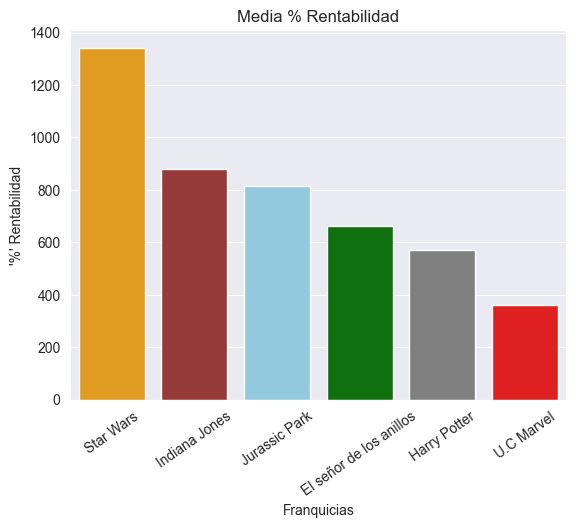

In [101]:
colores = ["orange","brown","skyblue","green","grey","red"]
data_franquicias = data_franquicias.sort_values(by="'%' Rentabilidad", ascending=False)
graf_presupuesto = sns.barplot(data=data_franquicias, x="Franquicias", y="'%' Rentabilidad", palette=colores, legend=False)
graf_presupuesto.set_xticklabels(graf_presupuesto.get_xticklabels(), rotation=35)
graf_presupuesto.set_title('Media % Rentabilidad')

Queremos indagar en la relación que puede la inversión en presupuesto frente a la facutración recibida, seguimos interesados en la comparación por franquicias. En este swarmplot mostramos como se distribuyen estos datos.

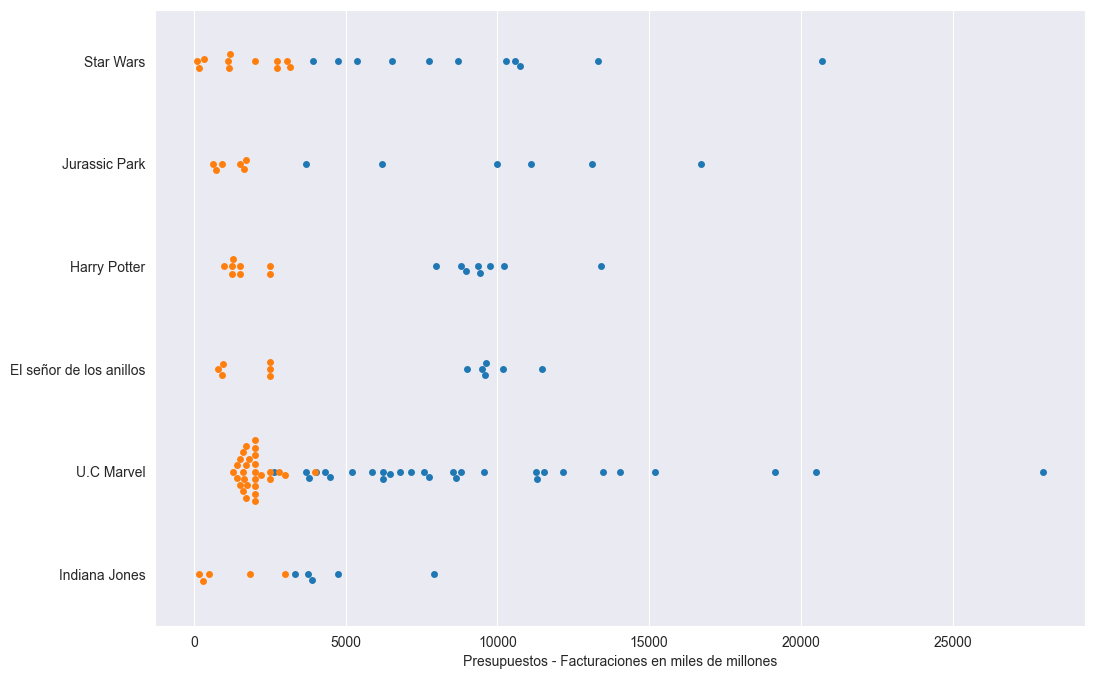

In [102]:
plt.figure(figsize=(12,8))
swarm = sns.swarmplot(data=data, x="Lifetime Gross", y="Franquicias")
swarm = sns.swarmplot(data=data, x="Budget", y="Franquicias")
swarm.set_xticklabels([666,0,5000,10000,15000,20000,25000])
plt.ylabel("")
plt.xlabel("Presupuestos - Facturaciones en miles de millones");

Llegados a este punto nos parece interesante convertir la variable numérica de la rentabilidad en una variable categórica para poder visualizar de otras maneras esta relación. 
Decidimos añadir una nueva columna a nuestro data frame.

In [103]:
Q1 = np.percentile(data["'%'Rentabilidad"], 25)
Q2 = np.percentile(data["'%'Rentabilidad"], 50)
Q3 = np.percentile(data["'%'Rentabilidad"], 75)

In [104]:
categoria_rentabilidad= []

for i in data["'%'Rentabilidad"]:
    if i <= Q1:
        categoria_rentabilidad.append("Poco rentable")
    elif i <= Q2:
        categoria_rentabilidad.append("Rentable")
    elif i <= Q3:
        categoria_rentabilidad.append("Muy rentable")
    else:
        categoria_rentabilidad.append("Extremadamente rentable")

In [105]:
categoria_rentabilidad

['Extremadamente rentable',
 'Extremadamente rentable',
 'Extremadamente rentable',
 'Extremadamente rentable',
 'Extremadamente rentable',
 'Extremadamente rentable',
 'Rentable',
 'Muy rentable',
 'Extremadamente rentable',
 'Muy rentable',
 'Extremadamente rentable',
 'Extremadamente rentable',
 'Extremadamente rentable',
 'Muy rentable',
 'Muy rentable',
 'Muy rentable',
 'Muy rentable',
 'Rentable',
 'Poco rentable',
 'Poco rentable',
 'Poco rentable',
 'Poco rentable',
 'Poco rentable',
 'Extremadamente rentable',
 'Poco rentable',
 'Muy rentable',
 'Rentable',
 'Muy rentable',
 'Poco rentable',
 'Poco rentable',
 'Rentable',
 'Rentable',
 'Poco rentable',
 'Rentable',
 'Extremadamente rentable',
 'Rentable',
 'Muy rentable',
 'Rentable',
 'Rentable',
 'Rentable',
 'Rentable',
 'Rentable',
 'Rentable',
 'Rentable',
 'Muy rentable',
 'Muy rentable',
 'Poco rentable',
 'Muy rentable',
 'Poco rentable',
 'Muy rentable',
 'Muy rentable',
 'Muy rentable',
 'Poco rentable',
 'Poco rent

In [106]:
data["Categoria Rent"] = categoria_rentabilidad

Es muy interesante ver en este gráfico como se distribuyen por grupos de rentabilidad y el grupo de peliculas extremadamente rentables son las que de media tienen el presupuesto mas ajustados.

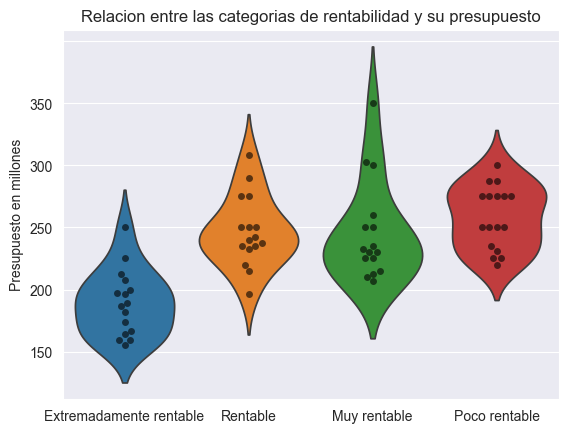

In [107]:
violin_rentable = sns.violinplot(x="Categoria Rent", y="Budget", data=data, hue="Categoria Rent" , inner=None);
violin_rentable = sns.swarmplot(x="Categoria Rent", y= "Budget", data=data, color="k", alpha=0.6)
valores_y = ["100","150","200","250","300","350"]
violin_rentable.set_yticklabels(valores_y)
plt.title("Relacion entre las categorias de rentabilidad y su presupuesto")
plt.ylabel("Presupuesto en millones")
plt.xlabel("");

Queriamos ver en resumen un cuadro general de las variables economicas más importantes y lo quisimos reflejar mediante este grafico de puntos que engloba cuatro variables como son el presupuesto, la facturación , la franquicia y la categoria según su rentabilidad.
Vemos como curiosamente las peliculas de las franquicias más antiguas y con un presupuesto menor están en el grupo de las extremadamente rentables y como la tendencia aumenta a gastar mas en presupuestos y facturar más pero evidentemente bajando la rentabilidad.

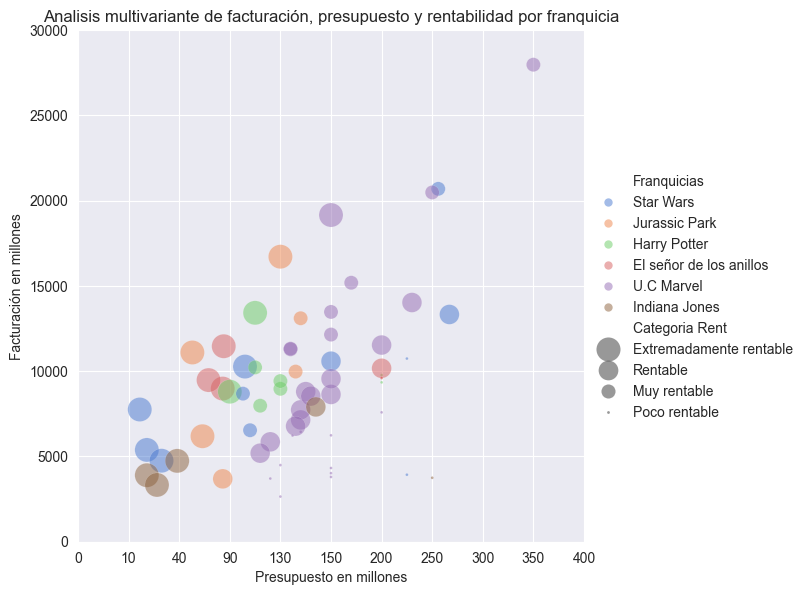

In [108]:
cuatro_variables = sns.relplot(data=data,
            x="Budget",
            y="Lifetime Gross",
            hue="Franquicias", size="Categoria Rent",
            sizes=(4, 300),
            alpha=.5, palette="muted",
            height=6);
valores_x = ["0","10","40","90","130","150","200","250","300","350","400"]
valores_y = ["0","5000","10000","15000","20000","25000","30000"]
cuatro_variables.set_yticklabels(valores_y)
cuatro_variables.set_xticklabels(valores_x)
plt.title("Analisis multivariante de facturación, presupuesto y rentabilidad por franquicia")
plt.ylabel("Facturación en millones")
plt.xlabel("Presupuesto en millones");

Visto esto queríamos ver si existian otro tipo de correlaciones en los datos y decidimos analizar el dataframe mediante un mapa de calor.

Algunas evidencias que podemos detectar de aqui es la correlación negativa entre el presupuesto y la rentabilidad. También encontramos con el presupuesto dos variables más que tienene correlacion negativa como son la puntuacion y la cantidad de votos.

Correlaciones positivas claras encontramos entre la puntuación y la cantidad de votos, y de manera ligeramente significativa entre estas con la rentabilida.

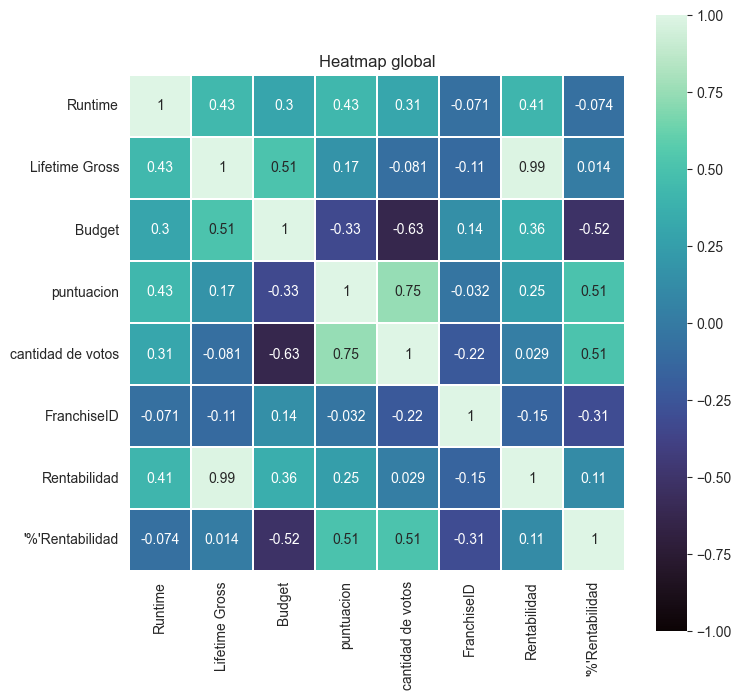

In [109]:
plt.figure(figsize=(8,8))
sns.heatmap(data.corr(numeric_only=True),
            vmin=-1,
            vmax=1,
            cmap=sns.color_palette("mako", as_cmap=True),
            square=True,
            linewidths=.1,
            annot=True)
plt.title("Heatmap global")
plt.show();

También queríamos tener en cuenta el factor tiempo y ver como ha evolucionado tanto la industria como la sociedad y la manera en la que producimos cine o en como lo consumimos y/o lo valoramos.

Vemos una clara tendencia a la alza en la facturacion de las peliculas con el paso de los años. Lo que va en detrimento en cuanto a la "mejor" en peliculas antiguas. Aquí influiran otro tipo de datos como el precio de las entradas de cine, el aumento de las salas y de la población en general y mas variables que serian dignas de estudio.

In [110]:
data["Year"] = data["Year"].astype(int)

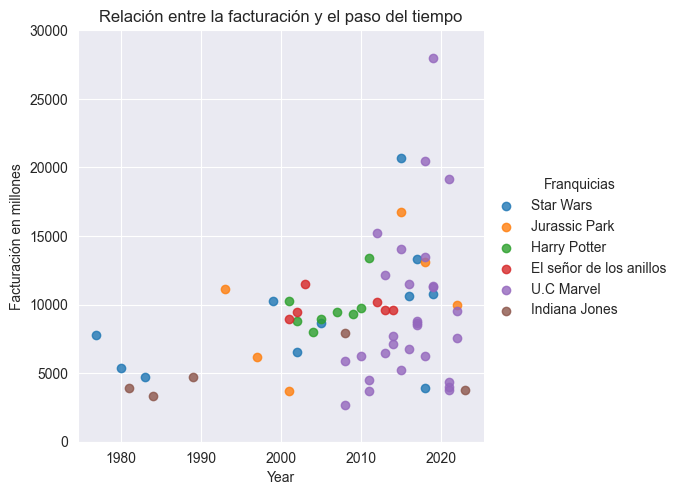

In [111]:
años_facturacion = sns.lmplot(data=data ,x="Year" ,y="Lifetime Gross",fit_reg=False, hue="Franquicias")
valores_y = ["0","5000","10000","15000","20000","25000","30000"]
años_facturacion.set_yticklabels(valores_y)
plt.title("Relación entre la facturación y el paso del tiempo")
plt.ylabel("Facturación en millones");

Aqui podemos ver otra clarísima tendencia ascendente en el presupuesto de las peliculas conforme el avance de los años. Podemos concluir que en general la industria del cine considera que debe de gastar cada vez más para facturar más.

In [112]:
#No entiendo por que no funcionan estas gráficas ahora, en la libreta_main2.ipynb las teneis perfectas.

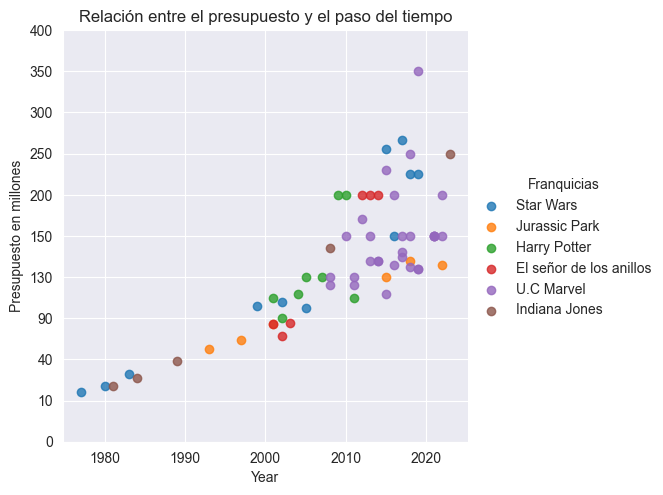

In [113]:
años_presupuesto = sns.lmplot(data=data ,x="Year" , y="Budget",fit_reg=False, hue="Franquicias");
valores_y = ["0","10","40","90","130","150","200","250","300","350","400"]
años_presupuesto.set_yticklabels(valores_y)
plt.title("Relación entre el presupuesto y el paso del tiempo")
plt.ylabel("Presupuesto en millones");

Curioso e interesante de ver como el paso del tiempo hace que la puntuacion que se le da a las peliculas sea menor. Como NextSteps podriamos tratar de ver que aspectos influyen en la bajada de las puntuaciones.

In [114]:
#El vector entre todas es la linea "Year" pero no consigo enmendar el error.

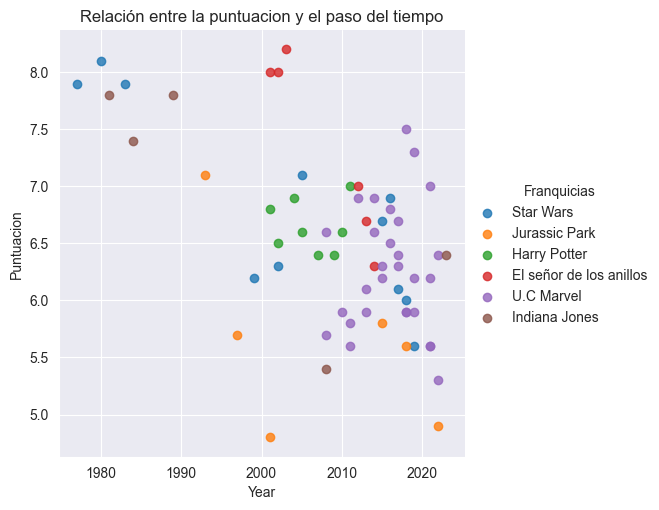

In [115]:
años_puntuacion = sns.lmplot(data=data ,x="Year" , y="puntuacion",fit_reg=False, hue="Franquicias")
plt.title("Relación entre la puntuacion y el paso del tiempo")
plt.ylabel("Puntuacion");


Como no podía ser de otra manera con las relaciones que estabamos viendo nos podiamos imaginar que la tendencia en la cantidad de votos iba a ser parecida y este gráfico corrobora que con el paso del tiempo la gente a pesar de que las peliculas tengan más facturación y más presupuesto vota menos. Factores que podrian influir? la saturación de peliculas en el mercado? la mala calidad de las mismas?el criterio de la sociedad moderna?. Digno de analizar seria.

In [116]:
# Idem -.-'. de verdad lo siento. 

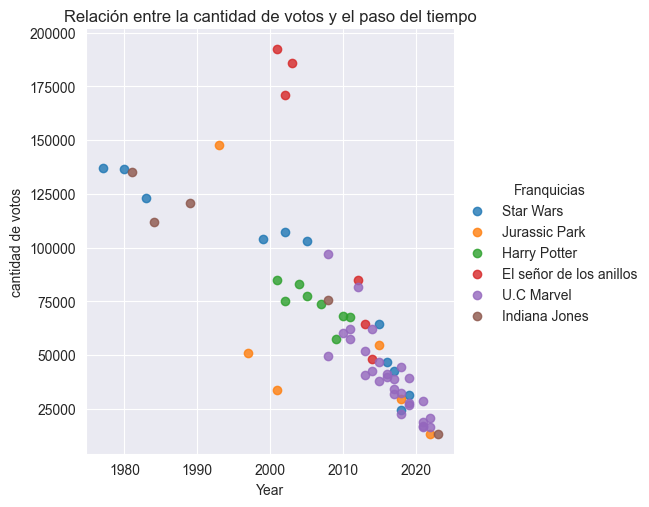

In [117]:
sns.lmplot(data=data ,x="Year" , y="cantidad de votos",fit_reg=False, hue="Franquicias");
plt.title("Relación entre la cantidad de votos y el paso del tiempo");


Por último análizaremos los números económicos individuales de las peliculas de Star Wars y sacaremos alguans conclusiones.

In [118]:
#Como no podia ser de otra manera los lmplot siguen fallando, podéis ver la gráfica en la misma libreta que las anteriores y/o en la presentación y la carpeta de imágenes que os adjunto.

Para poder explicar esto tenemos que poner en contexto. La Saga de Star Wars esta basada en 3 trilogias. La trilogia original es la que comenzó en el año 1977 con el episodio IV y continuo con el V y el VI.
La segunda trilogia es la que ocupa cronologicamente el primer puesto y tiene los episodios I,II y III.
La tercera trilogia es la más moderna y recupera el punto donde se quedó la trilogia original, completando una arco argumental con los epiosdios VII, VII y IX.

En el siguiente gráfico podemos apreciar como con el lanzamiento de una nueva trilogia la facturación se dispara y luego hay una tendencia decreciente dejando así como punta de lanza en cuanto a facturación a la primera pelicula de cada trilogia.

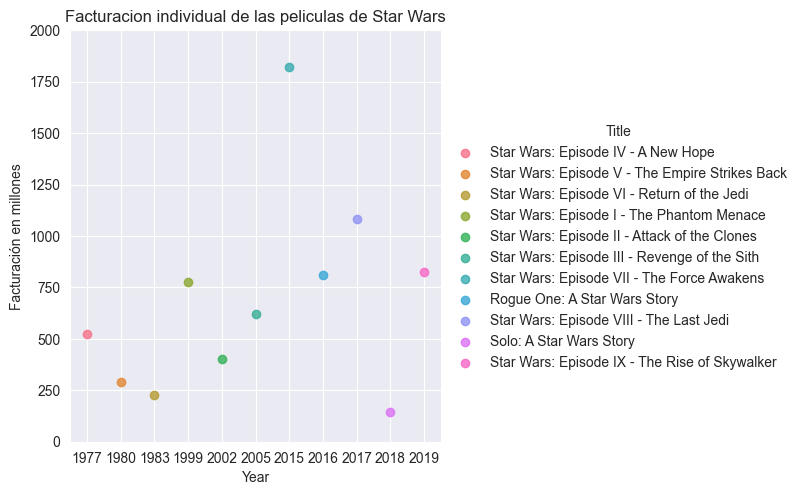

In [120]:
sw_individual = sns.lmplot(data=starwars ,x="Year" , y="Lifetime Gross",fit_reg=False, hue="Title")
valores_y = ["0","250","500","750","1000","1250","1500","1750","2000"]
sw_individual.set_yticklabels(valores_y)
plt.title("Facturacion individual de las peliculas de Star Wars")
plt.ylabel("Facturación en millones");

Aquí podemos ver que la tendencia anterior que según el paso de los años aumentaba la afluencia en cines y por ender la facturación es evidente sumada al insight de que el episodio VII es la primera pelicula de la última trilogia y así la convierte en la película más taquillera de StarWars.

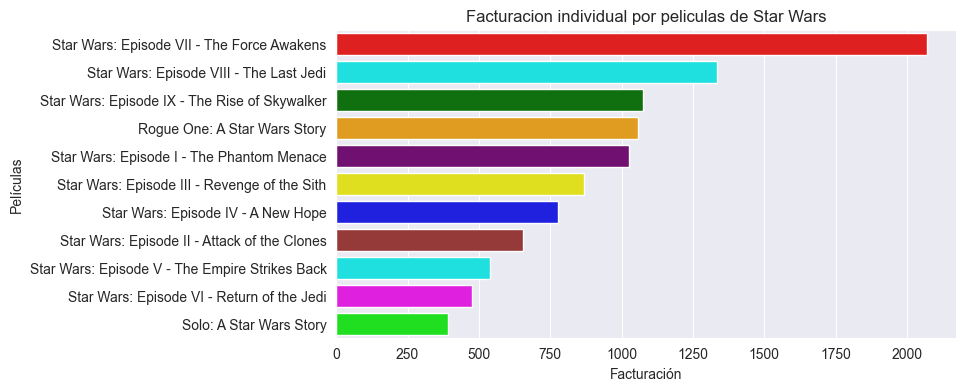

In [121]:
colores=["red","cyan","green","orange","purple","yellow","blue","brown","cyan","magenta","lime"]
datos_starwars = starwars.sort_values(by="Lifetime Gross", ascending=False)
plt.figure(figsize=(8, 4))
datos_starwars = sns.barplot(data=datos_starwars, x="Lifetime Gross", y="Title" ,palette=colores)
valores_x = ["0","250","500","750","1000","1250","1500","1750","2000"]
datos_starwars.set_xticklabels(valores_x)
plt.xlabel("Facturación")
plt.ylabel("Películas")
plt.title("Facturacion individual por peliculas de Star Wars");

Como ya habremos interiorizado en esta memoria, ser la mas taquillera no es sintoma de ser la que mas dinero a dejado a tu productor, y queríamos ver la rentabilidad en concreto de las peliculas individualmente.
La primera pelicula que se publicó de Star Wars por George Lucas como director en el año 1977 con un presupuesto de 11 millones de dolares obtuvo una facturacion mundial de 775 millones de dolares lo que hace una rentabilidad de 7000%. Y sin analisis de por medio que dejamos como next step este tremendísmo éxito en esta pelicula es lo que probablemente catapultaria a George Lucas en su carrera como director, pudiendo así crear la filmografía que ha creado.

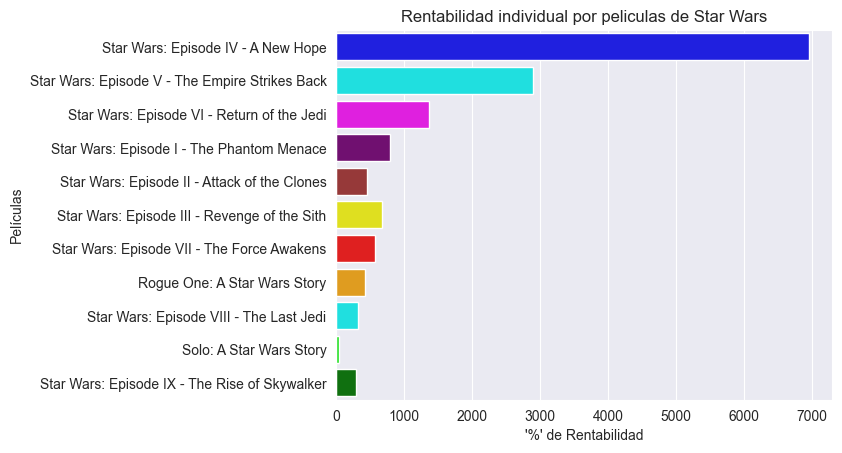

In [122]:
colores=["blue","cyan","magenta","purple","brown","yellow","red","orange","cyan","lime","green"]
datos_starwars = starwars.sort_values(by="'%'Rentabilidad", ascending=False)
datos_starwars = sns.barplot(data=starwars, x="'%'Rentabilidad", y="Title", palette=colores)
plt.xlabel("'%' de Rentabilidad")
plt.ylabel("Películas")
plt.title("Rentabilidad individual por peliculas de Star Wars");

# 5. Conclusiones

Habría que hacer una definición de que cualidades querríamos tener en cuanto para determinar cual es la mejor saga y poder así hacer un análisis más justo. Lo que si es cierto y podemos afirmar es que:
- Star Wars es la franquicia más rentable aunque no la más taquillera ni la más prolífica.
- La sociedad moldea la industria del cine y está se adapta o al contrario? El tiempo es un factor importante en el cambio, ambas mutan y vemos una tendencia hacia la pasividad en cuanto al voto y una bajada en la puntuacion de las peliculas ya sea por aumento del criterio o disminucion de la calidad del cine.
- El método de publicación de Star Wars mediante trilogias ha sido efectivo y obtiene un repunte tremendo en cada primera pelicula de cada grupo. 

## 6. Next Steps

- Determinar y analizar las mediade de votos por peliculas y franquicias seria interesante.
- Relacionar estos votos con los generos de las peliculas
- Determinar el protagonista de cada pelicula y su genero para tratar de ver patrones en tanto sociales como económicos. 
- Analizar la repercusión de la industria del cine en otras industrias, como la del retail y webscrapear los principales portales de venta de merchandising ver numero de articulos, precio, unidades vendidas de cada uno y por franquicia.
- Analizar la misma repercusion de la industria a nivel social y economico para para los actores y directores y como influye su participacion en franquicias existosas o no en su carrera.

pd: Lamento todos los warnings sin corregir, me han dado muchos dolores de cabeza los "tickslabels" y no podia dedicarle más tiempo, eso mismo podría ser el primer NextStep.

Memoria hecha por Alejandro Campos Ochoa.